In [2]:
# Install citipy
!pip install citipy


In [3]:
# Import dependendcies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from scipy.stats import linregress

# from numpy import random

# Pull API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [6]:
# Create a random number generator to pull city name and lat, long for 500 cities using citipy
    # iterative loop with lists for city name, city lat, city long
# use openweathermap.org to pull weather data for representatitive city
    # research API documentation to understand format to pull for each city
    # single pull after city name list is created?
# read data from JSON file; do this for a single city first



In [28]:
# Create cities list
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Set city sample size, loop range
samplesize = 1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=samplesize)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=samplesize)
lat_lngs = zip(lats, lngs)

# Initialize lists to store values, set counter range for use in loop:
count = 0
latitude = []
longitude = []
tempurature = []
humidity = []
cloudiness = []
windspeed = []

# Loop to create cities list, pull JSON data, and store values
for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Set endoint, build query-url
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Get weather datafile, check response code, if response code !200, then continue
    weather_response = requests.get(query_url)
    
    if weather_response.status_code != 200:
        print(f"{city} not found.  Skipping ... ")
    
    if weather_response.status_code == 200:
        
        if city not in cities:

            count = count + 1
              
            # if valid repsonse code and cities not in city, append city name, longitude, and latitude
            cities.append(city)
            print("Processing record {0} of {1}:  {2}".format(count, len(cities), city))
        
            weather_json = weather_response.json()

            # Select temperature (F), humidity (%), cloudiness (%), and wind speed (mph) from json
            long = weather_json["coord"]["lon"]
            lat = weather_json["coord"]["lat"]
            temp = weather_json["main"]["temp"]
            humid = weather_json["main"]["humidity"]
            clouds = weather_json["clouds"]["all"]
            windspd = weather_json["wind"]["speed"]
     
            # store city location and weather data to file
            longitude.append(long)
            latitude.append(lat)
            tempurature.append(temp)
            humidity.append(humid)
            cloudiness.append(clouds)
            windspeed.append(windspd)

            # troubleshoot = {"City":  city_out, "Temp": temp, "Humidity": humid, "Clouds": cloudiness, "Winds": windspeed}
            # print(troubleshoot)

            # print city to create print log for each city
            # print(city_out)

# format output to DataFrame    
output = {"City": cities, "Longitude": longitude, "Latitude": latitude, "Tempurature (F)": tempurature, 
      "Humidity": humidity, "Windspeed (MPH)": windspeed, "Cloudiness": cloudiness}

# Create a summary reccord of cities and data points found
print(len(cities), len(longitude), len(latitude), len(tempurature), len(humidity), len(cloudiness), len(windspeed))


Processing record 1 of 1:  khatanga
Processing record 2 of 2:  atuona
Processing record 3 of 3:  dikson
Processing record 4 of 4:  boende
Processing record 5 of 5:  codrington
Processing record 6 of 6:  cockburn town
Processing record 7 of 7:  ostrovnoy
Processing record 8 of 8:  mar del plata
Processing record 9 of 9:  new norfolk
Processing record 10 of 10:  ancud
Processing record 11 of 11:  pisco
Processing record 12 of 12:  lebu
Processing record 13 of 13:  takoradi
Processing record 14 of 14:  gat
Processing record 15 of 15:  punta arenas
Processing record 16 of 16:  robertsganj
Processing record 17 of 17:  ketchikan
Processing record 18 of 18:  tecoanapa
Processing record 19 of 19:  port alfred
Processing record 20 of 20:  hambantota
Processing record 21 of 21:  merauke
Processing record 22 of 22:  dharmanagar
lolua not found.  Skipping ... 
Processing record 23 of 23:  imeni babushkina
Processing record 24 of 24:  kavieng
Processing record 25 of 25:  talnakh
Processing record 2

Processing record 186 of 186:  birjand
Processing record 187 of 187:  arraial do cabo
Processing record 188 of 188:  saint-philippe
Processing record 189 of 189:  bandarbeyla
Processing record 190 of 190:  tygda
Processing record 191 of 191:  tashla
Processing record 192 of 192:  puerto escondido
Processing record 193 of 193:  lakes entrance
Processing record 194 of 194:  ruyigi
Processing record 195 of 195:  sampit
Processing record 196 of 196:  ulladulla
Processing record 197 of 197:  huejuquilla el alto
Processing record 198 of 198:  vytegra
Processing record 199 of 199:  hasaki
Processing record 200 of 200:  raudeberg
Processing record 201 of 201:  georgetown
taolanaro not found.  Skipping ... 
Processing record 202 of 202:  novyy urengoy
buariki not found.  Skipping ... 
Processing record 203 of 203:  bathsheba
samusu not found.  Skipping ... 
Processing record 204 of 204:  sandviken
Processing record 205 of 205:  hamada
Processing record 206 of 206:  anori
Processing record 207 o

Processing record 355 of 355:  saint charles
Processing record 356 of 356:  killybegs
skiros not found.  Skipping ... 
Processing record 357 of 357:  marawi
Processing record 358 of 358:  cobija
Processing record 359 of 359:  shimoda
palabuhanratu not found.  Skipping ... 
Processing record 360 of 360:  teguise
Processing record 361 of 361:  yenagoa
Processing record 362 of 362:  oktyabrskiy
Processing record 363 of 363:  hofn
Processing record 364 of 364:  imeni poliny osipenko
Processing record 365 of 365:  kiunga
Processing record 366 of 366:  havelock
Processing record 367 of 367:  biharamulo
Processing record 368 of 368:  saint-donat-de-montcalm
Processing record 369 of 369:  vallenar
Processing record 370 of 370:  sovetskiy
Processing record 371 of 371:  husavik
Processing record 372 of 372:  freeport
Processing record 373 of 373:  arroyo
Processing record 374 of 374:  broome
Processing record 375 of 375:  moussoro
gulshat not found.  Skipping ... 
Processing record 376 of 376:  

Processing record 522 of 522:  kolarovo
Processing record 523 of 523:  bohodukhiv
Processing record 524 of 524:  buraydah
Processing record 525 of 525:  bubaque
Processing record 526 of 526:  pontianak
toliary not found.  Skipping ... 
Processing record 527 of 527:  sibu
Processing record 528 of 528:  bac lieu
Processing record 529 of 529:  triunfo
Processing record 530 of 530:  dicabisagan
Processing record 531 of 531:  pechora
samusu not found.  Skipping ... 
Processing record 532 of 532:  hirara
Processing record 533 of 533:  birin
Processing record 534 of 534:  asau
taolanaro not found.  Skipping ... 
Processing record 535 of 535:  simpang
Processing record 536 of 536:  rupert
nizhneyansk not found.  Skipping ... 
taolanaro not found.  Skipping ... 
umzimvubu not found.  Skipping ... 
Processing record 537 of 537:  walvis bay
Processing record 538 of 538:  bilibino
Processing record 539 of 539:  anchorage
vaitupu not found.  Skipping ... 
saleaula not found.  Skipping ... 
Processi

In [29]:
# Test output data with input data
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
weather_response = requests.get(query_url)
weather_json = weather_response.json()
name = weather_json["name"]
longs = weather_json["coord"]["lon"]
lats = weather_json["coord"]["lat"]
temp = weather_json["main"]["temp"]
humid = weather_json["main"]["humidity"]
clouds = weather_json["clouds"]["all"]
windspd = weather_json["wind"]["speed"]

print(name, longs, lats, temp, humid, windspd, clouds)

print(query_url)

Busselton 115.33 -33.65 61.99 75 13.53 82
http://api.openweathermap.org/data/2.5/weather?appid=73f5eef4ab6510912790a3c3d182fec9&q=busselton&units=imperial


In [34]:
# Convert to dataframe, and export entire city data file as a CSV
output_df = pd.DataFrame(output)
output_df.to_csv("Output Folders/full_output.csv", index=False, header=True)
output_df.head()

,City,Longitude,Latitude,Tempurature (F),Humidity,Windspeed (MPH),Cloudiness
0,khatanga,102.50,71.97,40.59,86,5.14,100
1,atuona,-139.03,-9.80,79.95,76,23.98,8
2,dikson,80.55,73.51,38.73,91,14.94,84
3,boende,20.87,-0.22,73.98,92,1.70,100
4,codrington,141.97,-38.27,44.51,86,3.18,100


In [31]:
# Review dataframe summary info,number of unique cities
# output_df.info()
# output_df.nunique()

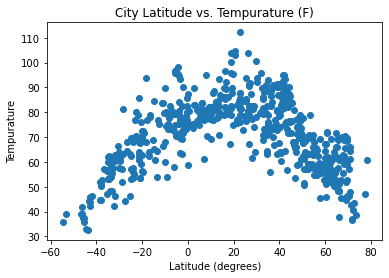

In [56]:
# Scatter plot - tempurature vs latitude

plt.scatter(latitude, tempurature, marker = "o")
plt.title("City Latitude vs. Tempurature (F)")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Tempurature")
plt.savefig("Output Folders/fig1.png", dpi=300)      
plt.show()
                         

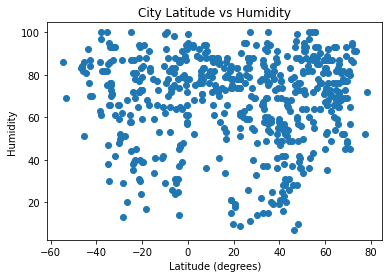

In [57]:
# Scatter plot - humidity vs latitude

plt.scatter(latitude, humidity, marker = "o")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")
plt.savefig("Output Folders/fig2.png", dpi=300)  
plt.show()
                             

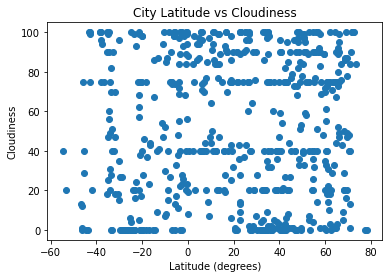

In [58]:
# Scatter plot - cloudiness vs latitude

plt.scatter(latitude, cloudiness, marker = "o")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness")
plt.savefig("Output Folders/fig3.png", dpi=300) 
plt.show()
                               

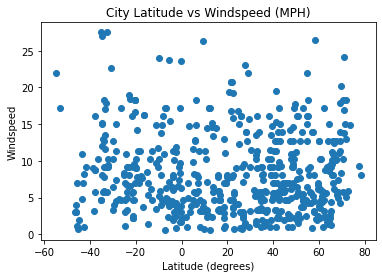

In [59]:
# Scatter plot - windspeed vs latitude

plt.scatter(latitude, windspeed, marker = "o")
plt.title("City Latitude vs Windspeed (MPH)")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Windspeed")
plt.savefig("Output Folders/fig4.png", dpi=300) 
plt.show()
                               

In [60]:
# Create Northern and Southern hemisphere datasets and define regression and plot func
north_df = output_df[output_df["Latitude"] > 0]
south_df = output_df[output_df["Latitude"] < 0]

# Create list for graphing data
x_values = []
y_values = []

# north_df.head()

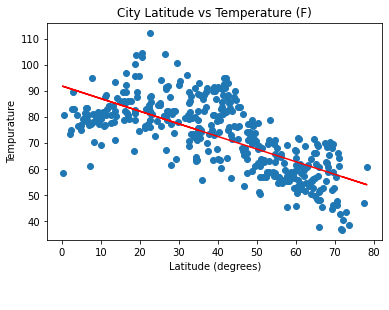

-0.6910264414357923


In [61]:
# Nothern Hemisphere:  Tempurature vs. Latitude
x_values = north_df["Latitude"]
y_values = north_df["Tempurature (F)"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Temperature (F)")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Tempurature")
plt.savefig("Output Folders/fig5.png", dpi=300) 
plt.show()
print(rvalue)


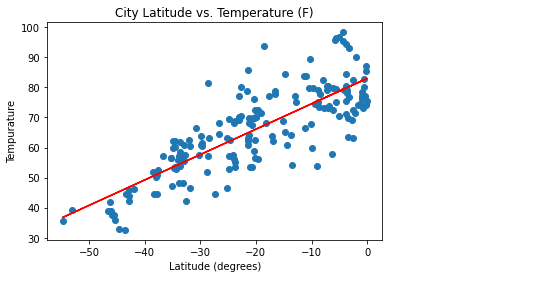

0.8136684826953684


In [62]:
# Southern Hemisphere:  Tempurature vs. Latitude
x_values = south_df["Latitude"]
y_values = south_df["Tempurature (F)"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Temperature (F)")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Tempurature")
plt.savefig("Output Folders/fig6.png", dpi=300) 
plt.show()
print(rvalue)

In [63]:
##  NOTES:  Latitude vs. Tempuratare relationships
    # Strong correlation between latitude and tempurature as you would expect (adn as noted by rvalue)
    # while one relationship looks positive and the other negative, the correlation is in fact the same
    # Further away from 0 degress latitude (equator), the colder the tempuratures will be
    # Difference in regression slopes is due to +/- sign convention of latitude above and below equator
    # If measured as distance from equator (abs (latitude) - 0 degress latitude), then charts would look similar

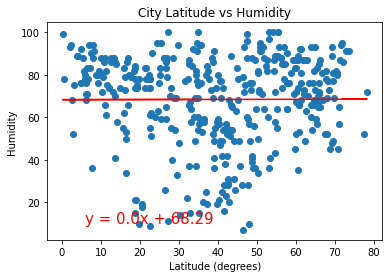

0.002559429242982704


In [64]:
# Nothern Hemisphere:   Humidity vs. latitude
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")
plt.savefig("Output Folders/fig7.png", dpi=300) 
plt.show()
print(rvalue)

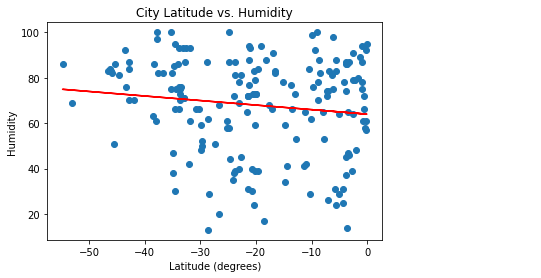

-0.132706443396686


In [65]:
# Southern Hemisphere:  Humidity vs. latitude
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")
plt.savefig("Output Folders/fig8.png", dpi=300) 
plt.show()
print(rvalue)

In [66]:
##  NOTES:  Latitude vs. Humidity
 # Very little correlation between latitude and humidity as noted by shape of scatter, flat regression line, and low rvalue
 # Appers to be a slighty higher concentration of high humid zones near equator in southern hemisphere than northern
 

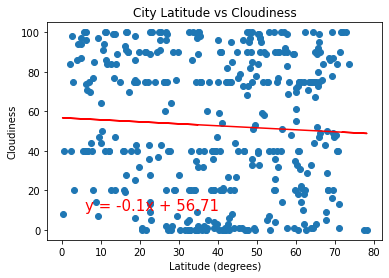

-0.05630346395601577


In [67]:
# Nothern Hemisphere: Cloudiness vs. Latitude
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness")
plt.savefig("Output Folders/fig9.png", dpi=300) 
plt.show()
print(rvalue)

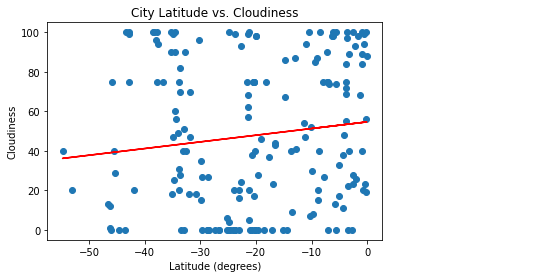

0.12739971820687543


In [68]:
# Southern Hemisphere: Cloudiness vs. Latitude
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness")
plt.savefig("Output Folders/fig10.png", dpi=300) 
plt.show()
print(rvalue)

In [69]:
##  NOTES:  Latitude vs. Cloudiness
 # Very little correlation between latitude and cloudiness as noted by shape of scatter, flat regression line, and low rvalue
 # There are some interesting datapoints, which appear to cluster around 0, 40 +/-, and 75 +/- degress latitude
 # Observations are more prevalent in northern hemisphere, but likely due to more datapoints in northern hemisphere
 # More datapoints in northern hemisphere likely due to greater population density in north and not sampling issue


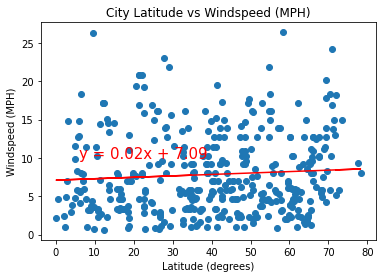

0.07007132497274854


In [70]:
# Nothern Hemisphere:  Wind Speed vs. latitude
x_values = north_df["Latitude"]
y_values = north_df["Windspeed (MPH)"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Windspeed (MPH)")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Windspeed (MPH)")
plt.savefig("Output Folders/fig11.png", dpi=300) 
plt.show()
print(rvalue)

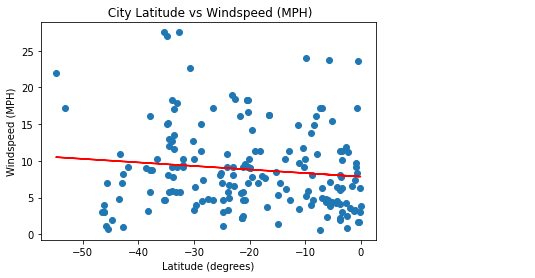

-0.11701078379728344


In [71]:
# Southern Hemisphere:  Wind Speed vs. latitude
x_values = south_df["Latitude"]
y_values = south_df["Windspeed (MPH)"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title(" City Latitude vs Windspeed (MPH)")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Windspeed (MPH)")
plt.savefig("Output Folders/fig12.png", dpi=300) 
plt.show()
print(rvalue)

In [72]:
##  NOTES:  Latitude vs. Windspeed
 # Very little correlation between latitude and cloudiness as noted by shape of scatter, flat regression line, and low rvalue
 # Windspeeds appear to be equally distributed across degrees of latitude